In [1]:
!pip install -Uq diffusers transformers fastcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 121.0 MB/s eta 0:00:00


In [2]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)

if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [5]:
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id,torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
!ls ~/.cache/huggingface/diffusers/

models--CompVis--stable-diffusion-v1-4


In [7]:
pipe.to("cuda")

RuntimeError: ignored

In [ ]:
pipe.enable_attention_slicing()

In [ ]:
prompt = "girl in a cage"
image = pipe(prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

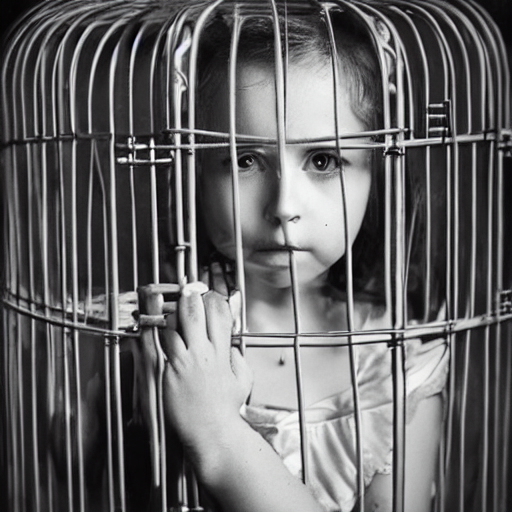

In [ ]:
image[0]

  0%|          | 0/50 [00:00<?, ?it/s]

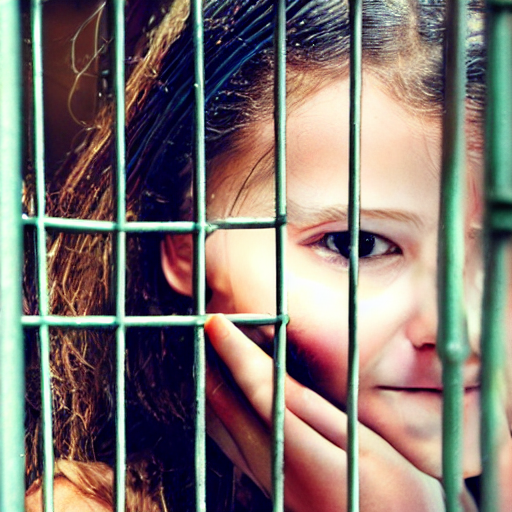

In [ ]:
torch.manual_seed(100)
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

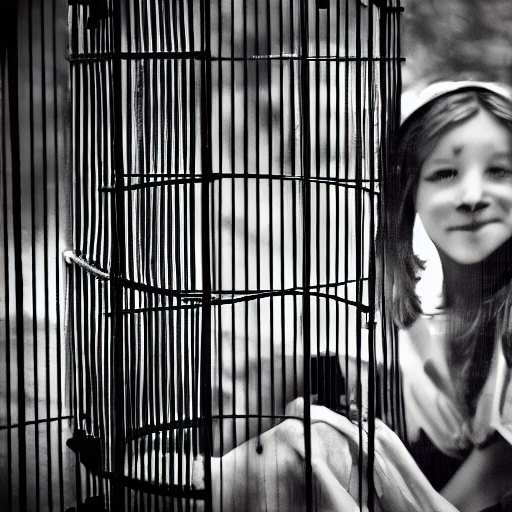

In [ ]:
torch.manual_seed(123)
pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

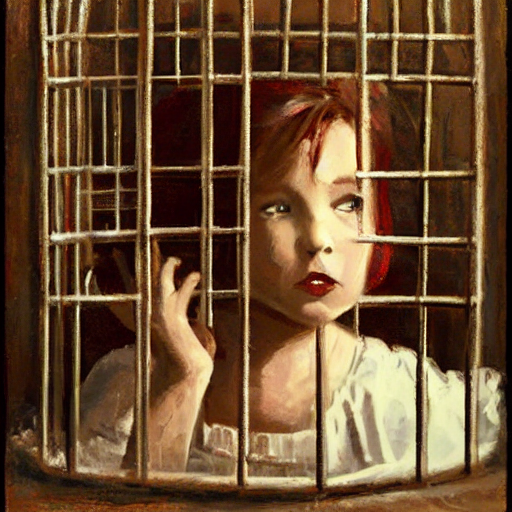

In [ ]:
torch.manual_seed(1)
pipe(prompt,).images[0]

  0%|          | 0/3 [00:00<?, ?it/s]

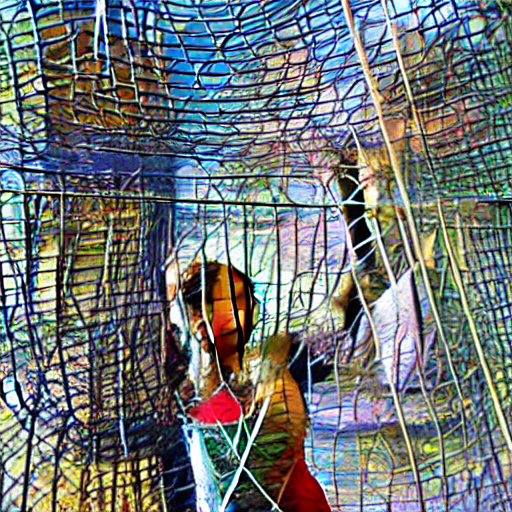

In [ ]:
torch.manual_seed(100)
pipe(prompt, num_inference_steps = 3).images[0]

  0%|          | 0/17 [00:00<?, ?it/s]

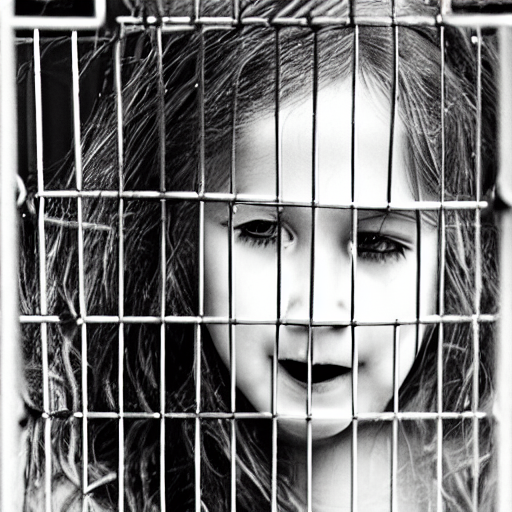

In [ ]:
torch.manual_seed(100)
pipe(prompt, num_inference_steps = 17).images[0]

In [25]:
def image_grid(imgs, rows,cols):
  w,h = imgs[0].size
  grid = Image.new("RGB", size = (cols*w,rows*h))
  for i,img in enumerate(imgs):
    grid.paste(img,box=(i%w*cols,i//h*cols))
  return grid

In [56]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%w*cols, i//h*cols))
    return grid

In [ ]:
num_col,num_row = 4,4
prompt = "shaking hand in the office"
prompts = [prompt]*num_col*num_row
images = concat(pipe(prompts, guidance_scale = g).images for g in [1.1,3,7,14])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image_grid(images,4,4)

Output hidden; open in https://colab.research.google.com to view.

  0%|          | 0/50 [00:00<?, ?it/s]

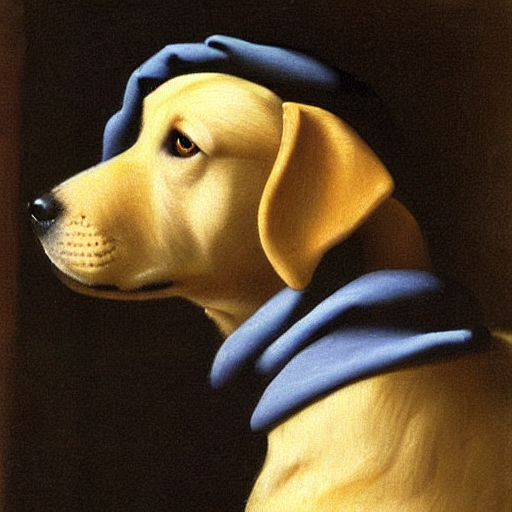

In [50]:
torch.manual_seed(1000)
pipe("labrador in the style of vermeer").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

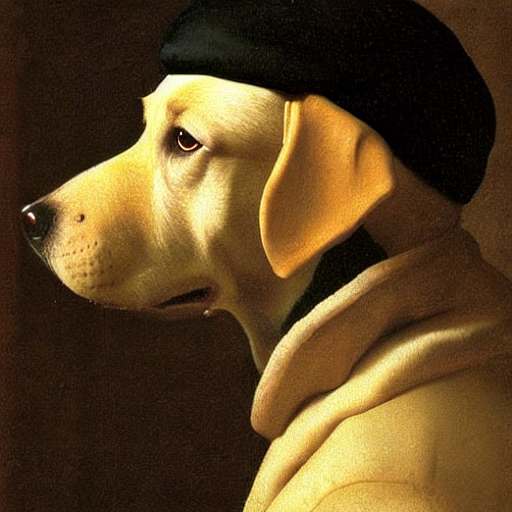

In [51]:
torch.manual_seed(1000)
pipe("labrador in the style of vermeer", negative_prompt = "blue").images[0]

In [68]:
!wget https://s3.amazonaws.com/moonup/production/uploads/1664665907257-noauth.png

--2023-01-28 10:58:54--  https://s3.amazonaws.com/moonup/production/uploads/1664665907257-noauth.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.160.216, 54.231.232.176, 52.217.232.176, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.160.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46150 (45K) [image/png]
Saving to: ‘1664665907257-noauth.png’

1664665907257-noaut 100%[===================>]  45.07K   204KB/s    in 0.2s    

2023-01-28 10:58:55 (204 KB/s) - ‘1664665907257-noauth.png’ saved [46150/46150]



In [69]:
init_image = Image.open("/content/1664665907257-noauth.png").convert("RGB")

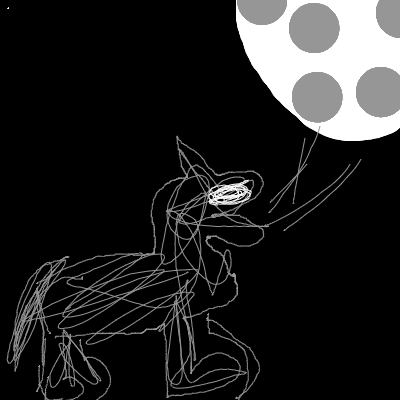

In [70]:
init_image

In [6]:
from diffusers import StableDiffusionImg2ImgPipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision = "fp16", torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [7]:
pipe.to("cuda")

StableDiffusionImg2ImgPipeline {
  "_class_name": "StableDiffusionImg2ImgPipeline",
  "_diffusers_version": "0.12.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [72]:
torch.manual_seed(1000)
prompt = "Wolf howling at the moon, photorealistic 4K"
image = img_pipe(prompt, init_image=init_image , num_images_per_prompt=3, strength=0.8, num_inference_steps=50).images

  0%|          | 0/40 [00:00<?, ?it/s]

In [80]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

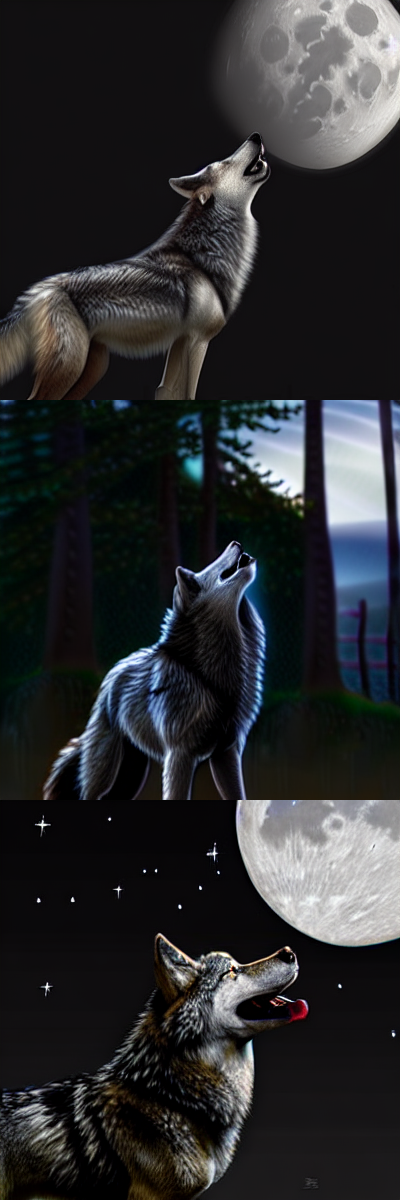

In [81]:
image_grid(image,3,1)

In [78]:
r = Image.open("/content/r.jpg").convert("RGB")

In [86]:
prompt = "in ancient egptian style"
r_ai = pipe(prompt, init_image = r, num_images_per_prompt=3, num_inference_steps=50, strength= 0.8).images

  0%|          | 0/40 [00:00<?, ?it/s]

In [87]:
image_grid(r_ai,1,3)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
png = Image.open("/content/Untitled.png").convert("RGB")

In [22]:
png = png.resize((250,250))

In [32]:
torch.manual_seed(10)
prompt = "a swordman"
images = pipe(prompt, init_image = png, num_images_per_prompt=3, num_inference_steps=5, strength= 0.8).images

  0%|          | 0/4 [00:00<?, ?it/s]

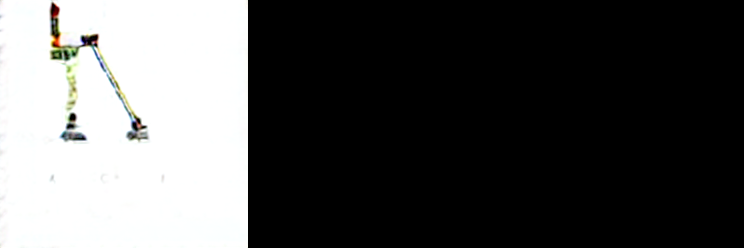

In [33]:
image_grid(images,1,3)

pipe textual model

In [4]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16) 
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [5]:
from fastdownload import FastDownload
embeds_url = "https://huggingface.co/sd-concepts-library/indian-watercolor-portraits/resolve/main/learned_embeds.bin"
embeds_path = FastDownload().download(embeds_url)

In [6]:
embeds_path

Path('/root/.fastdownload/archive/learned_embeds.bin')

In [7]:
embeds_dict = torch.load(str(embeds_path), map_location = "cpu")

In [ ]:
embeds_dict

In [23]:
tokenizer = pipe.tokenizer
textencoder = pipe.text_encoder
new_token, embeds = next(iter(embeds_dict.items()))
embeds = embeds.to(textencoder.dtype)


In [24]:
new_token

'<watercolor-portrait>'

In [ ]:
assert tokenizer.add_tokens(new_token) == 1, "The token already exists!"


In [31]:
textencoder.resize_token_embeddings(len(tokenizer))
new_token_id = tokenizer.convert_tokens_to_ids(new_token)
textencoder.get_input_embeddings().weight.data[new_token_id] = embeds

In [35]:
img = pipe("a woman reading in style of <watercolor-portrait>").images

  0%|          | 0/50 [00:00<?, ?it/s]

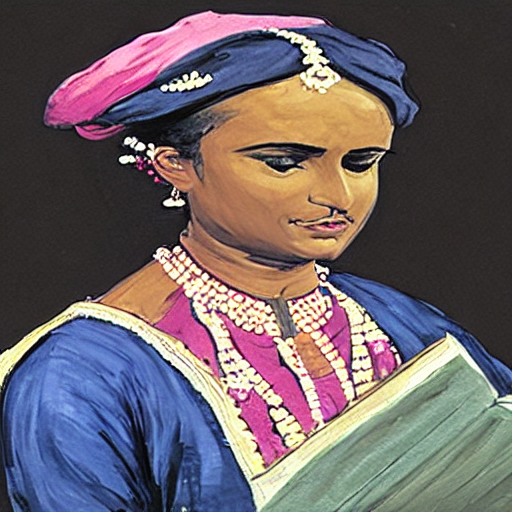

In [36]:
img[0]

In [37]:
pipe = StableDiffusionPipeline.from_pretrained("pcuenq/jh_dreambooth_1000", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [39]:
torch.manual_seed(1000)

prompt = "Painting of sks person in the style of Paul Signac"
images = pipe(prompt, num_images_per_prompt=4).images
image_grid(images, 1, 4)

Output hidden; open in https://colab.research.google.com to view.

In [40]:
torch.manual_seed(10)

prompt = "Painting of sks person in the style of varmeer"
images = pipe(prompt, num_images_per_prompt=4).images
image_grid(images, 1, 4)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
torch.manual_seed(10)

prompt = "a lolipop brand "
images = pipe(prompt, num_images_per_prompt=4).images
image_grid(images, 1, 4)

Output hidden; open in https://colab.research.google.com to view.

# latant callbacks

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained("pcuenq/jh_dreambooth_1000", torch_dtype=torch.float16)
pipe = pipe.to("cuda")


In [ ]:
vae = pipe.vae
vae

In [5]:
def latents_callback(i,t,latents):
    latents = 1 / 0.18215 * latents
    image = vae.decode(latents).sample[0]
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.cpu().permute(1, 2, 0).numpy()
    images.extend(pipe.numpy_to_pil(image))

In [82]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
images = []
prompt = "Portrait painting of Jeremy Howard looking happy."
torch.manual_seed(1000)
final_image = pipe(prompt, callback=latents_callback, callback_steps=12).images[0]
images.append(final_image)



In [ ]:
vae = pipe.vae
images = []

def latents_callback(i, t, latents):
    latents = 1 / 0.18215 * latents
    image = vae.decode(latents).sample[0]
    image = (image / 2 + 0.5).clamp(0, 1)
    image = image.cpu().permute(1, 2, 0).numpy()
    images.extend(pipe.numpy_to_pil(image))

prompt = "Portrait painting of Jeremy Howard looking happy."
torch.manual_seed(9000)
final_image = pipe(prompt, callback=latents_callback, callback_steps=12).images
images.append(final_image)


In [ ]:
image_grid(images[:3],1,len(images))

In [30]:
from diffusers import StableDiffusionImg2ImgPipeline
img_pipe =StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision = "fp16", torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
img_pipe.to("cuda")

In [33]:
!pip install duckduckgo_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [34]:
from duckduckgo_search import ddg_images

In [38]:
ddg_images("checken")[0]["image"]

'https://i.ytimg.com/vi/XeAZm-3BNjk/maxresdefault.jpg'

In [44]:
from  fastdownload import FastDownload
path = FastDownload().download("https://i.ytimg.com/vi/XeAZm-3BNjk/maxresdefault.jpg")

In [49]:
img = Image.open(path).convert("RGB").resize((512,512))

In [53]:
out = img_pipe("dinasour", init_image = img , strength= 0.7 , num_images_per_prompt=3,num_inference_steps= 40 ).images

  0%|          | 0/28 [00:00<?, ?it/s]

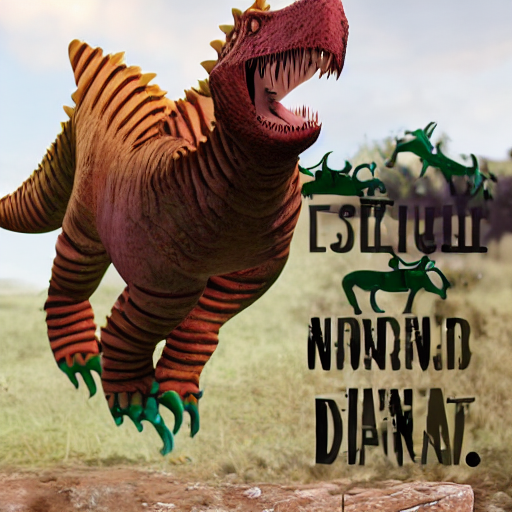

In [67]:
out[2]